<a href="https://colab.research.google.com/github/belalosman16/SVM/blob/main/Another_copy_of_SVM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

# importing the libraries

In [ ]:
# Import necessary libraries
import opendatasets as od  # For downloading datasets
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
%matplotlib inline

# Importing machine learning libraries
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For preprocessing data
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.compose import ColumnTransformer  # For column transformations
from sklearn.pipeline import Pipeline  # For creating pipelines
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.model_selection import cross_val_score
import imblearn
from imblearn.over_sampling import RandomOverSampler ### For the imbalanced data
from collections import Counter # to count the balanced data
# Importing evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score ,classification_report , accuracy_score ,mean_squared_error, r2_score
import sklearn.metrics as metrics
from sklearn.svm import SVR


## downlod the data from the kaggle

In [ ]:
# Downloading the dataset
od.download("https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing")

Skipping, found downloaded files in "./bank-marketing" (use force=True to force download)


# Information of the dataset
### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### get the data set

In [ ]:
file_path = "/content/bank-marketing/bank-additional-full.csv"
df = pd.read_csv(file_path, sep = ';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Imbalanced data

## Mapping the target if 'yes': 1 , 'no': 0



In [ ]:
# Mapping dictionary: maps 'yes' to 1 and 'no' to 0
mapping = {'yes': 1, 'no': 0}

# Apply the mapping to the 'y' column of the DataFrame using the map() function
# This replaces 'yes' with 1 and 'no' with 0
df['y'] = df['y'].map(mapping)

df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


### the columns and the count of non_null and the data_type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# Cleaning the data

### Remove duplicate rows from the DataFrame

In [ ]:
# Remove duplicate rows from the DataFrame
# inplace = True modifies the DataFrame in place (no need to assign the result to a new variable)
# ignore_index = True resets the index after dropping duplicates
df.drop_duplicates(inplace = True, ignore_index = True)

# Print the shape of the DataFrame after dropping duplicates
# This will show the number of rows and columns in the DataFrame
print("Shape of DataFrame after removing duplicates:", df.shape)

df

Shape of DataFrame after removing duplicates: (41176, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41171,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41172,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41173,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41174,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
# Display concise summary information about the DataFrame
# This includes the data types, non-null counts, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

### Get the sum of the missing values

#### There is no missing values

In [ ]:
# Check for missing values in each column of the DataFrame
# The isnull() method returns a DataFrame of the same shape as df, where each cell is True if the corresponding value in df is missing, and False otherwise
# The sum() method calculates the total number of missing values in each column by summing the True values (True is treated as 1 and False as 0)
missing_values = df.isnull().sum()

# Print the total number of missing values in each column
# This provides a summary of missing values in the DataFrame, showing how many missing values are there in each column
print(missing_values)


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


#### this plot show the box plot between the age and the target

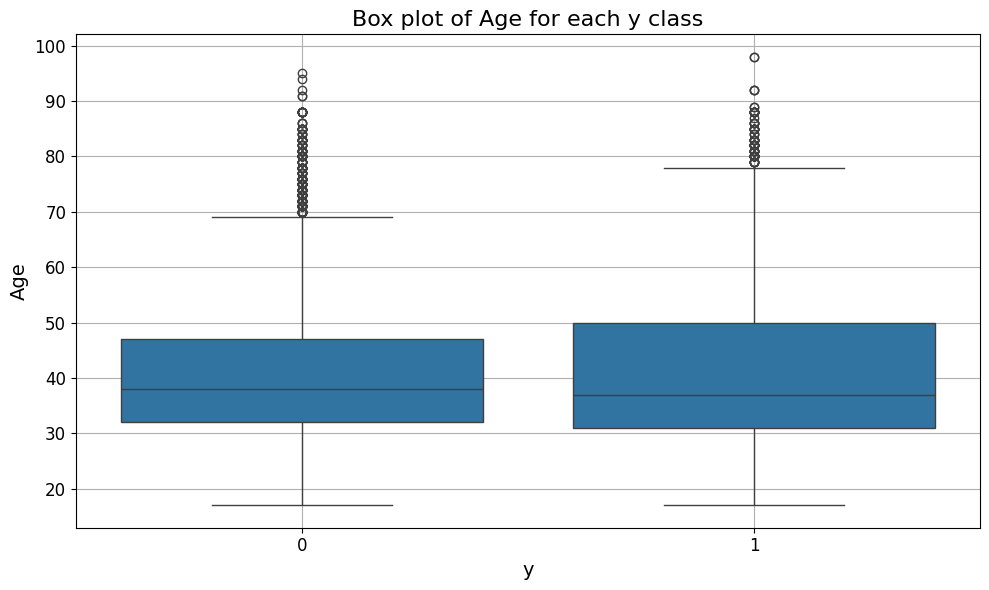

In [ ]:
# Plot box plots of 'Age' for each target class
plt.figure(figsize=(10, 6))  # Set the figure size
plt.title('Box plot of Age for each y class', fontsize=16)  # Set the plot title
sns.boxplot(x='y', y='age', data=df)  # Create the box plot
plt.xlabel('y', fontsize=14)  # Set the x-axis label
plt.ylabel('Age', fontsize=14)  # Set the y-axis label
plt.xticks(fontsize=12)  # Set the font size of x-axis ticks
plt.yticks(fontsize=12)  # Set the font size of y-axis ticks
plt.grid(True)  # Show grid lines
plt.tight_layout()  # Adjust layout to prevent overlap of labels
plt.show()  # Display the plot

## this plot show the count of "0" and "1" in the target class

### from this plot we know that the data is imbalance data

y
0    88.733728
1    11.266272
Name: count, dtype: float64



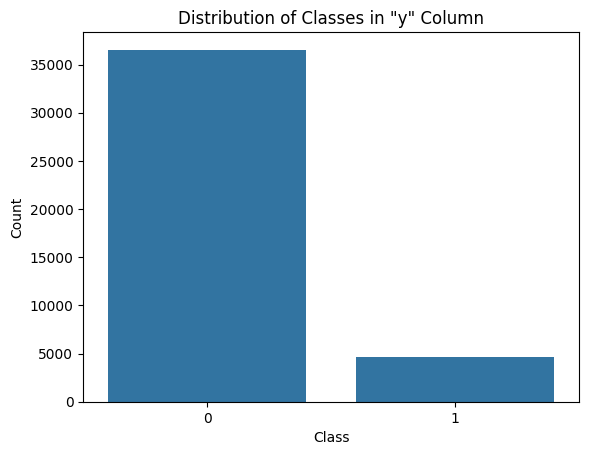

In [ ]:
# Calculate the percentage of each class in the 'y' column and print the result
class_distribution = df["y"].value_counts() / len(df) * 100
print(class_distribution)
print()  # Print an empty line for better readability

# Plot a count plot of the 'y' column
# This visualization shows the distribution of classes in the 'y' column
sns.countplot(data=df, x='y')
plt.title('Distribution of Classes in "y" Column')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## plot the numerical columns

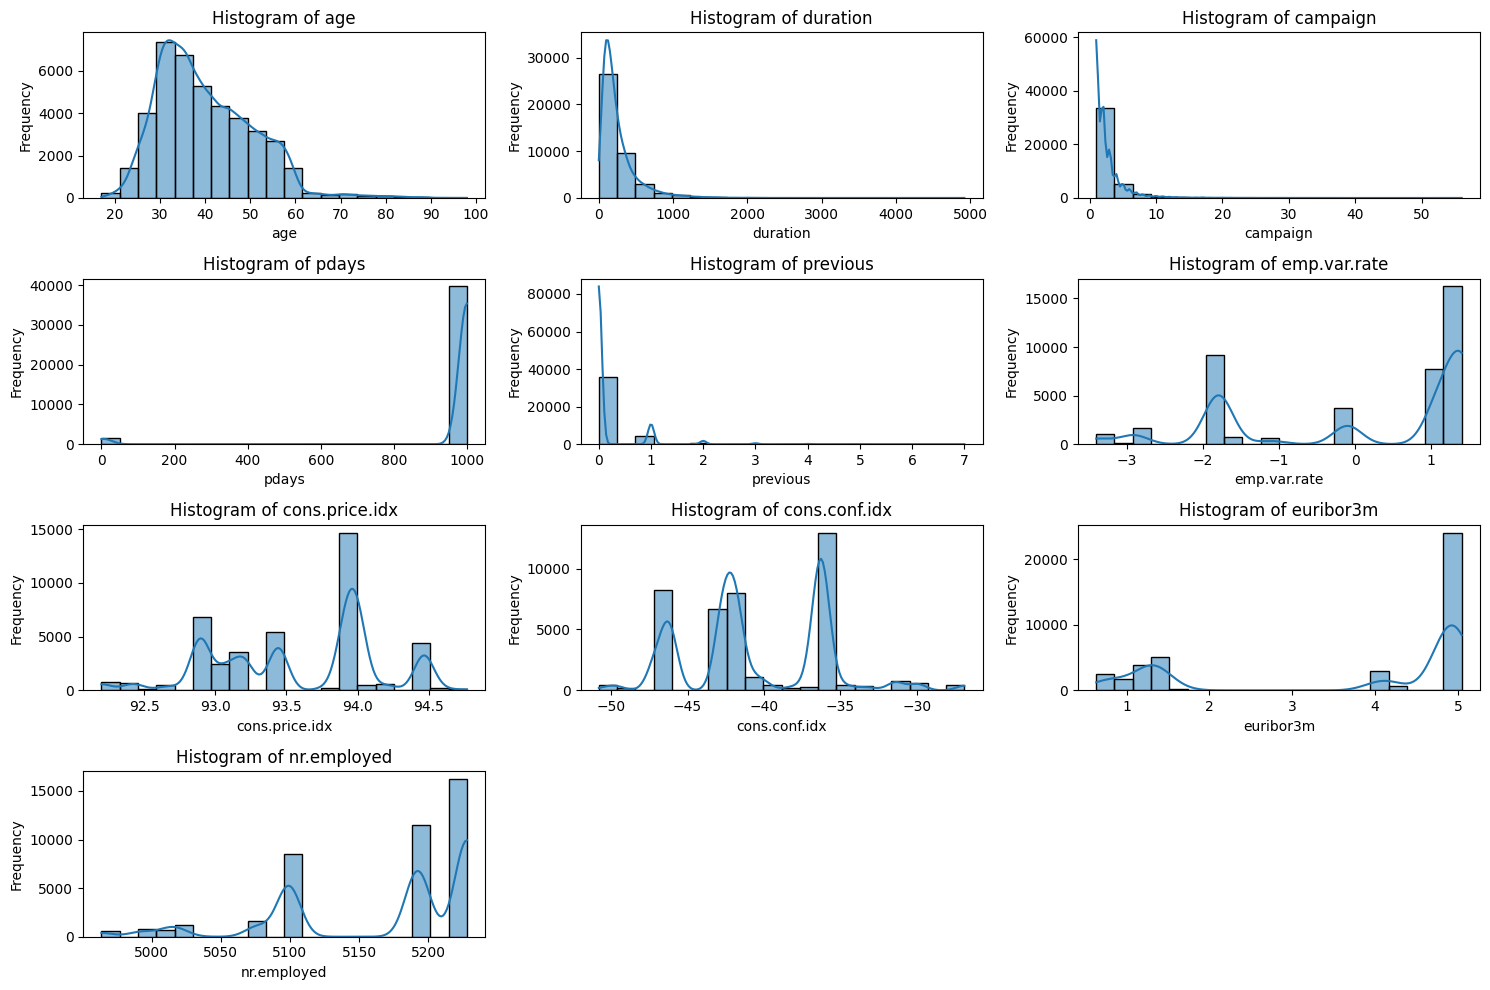

In [ ]:
# Number of rows and columns for subplots
num_rows = 4  # Total number of numerical columns divided by 3, rounded up
num_cols = 3

# List of numerical columns to visualize
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


# Calculate total number of subplots needed
total_plots = len(numerical_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each numerical column and plot histogram
for i, col in enumerate(numerical_cols):
    # Plot histogram using seaborn histplot
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])

    # Set plot title
    axes[i].set_title(f'Histogram of {col}')

    # Set x-axis label
    axes[i].set_xlabel(col)

    # Set y-axis label
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


## plot the categorical columns

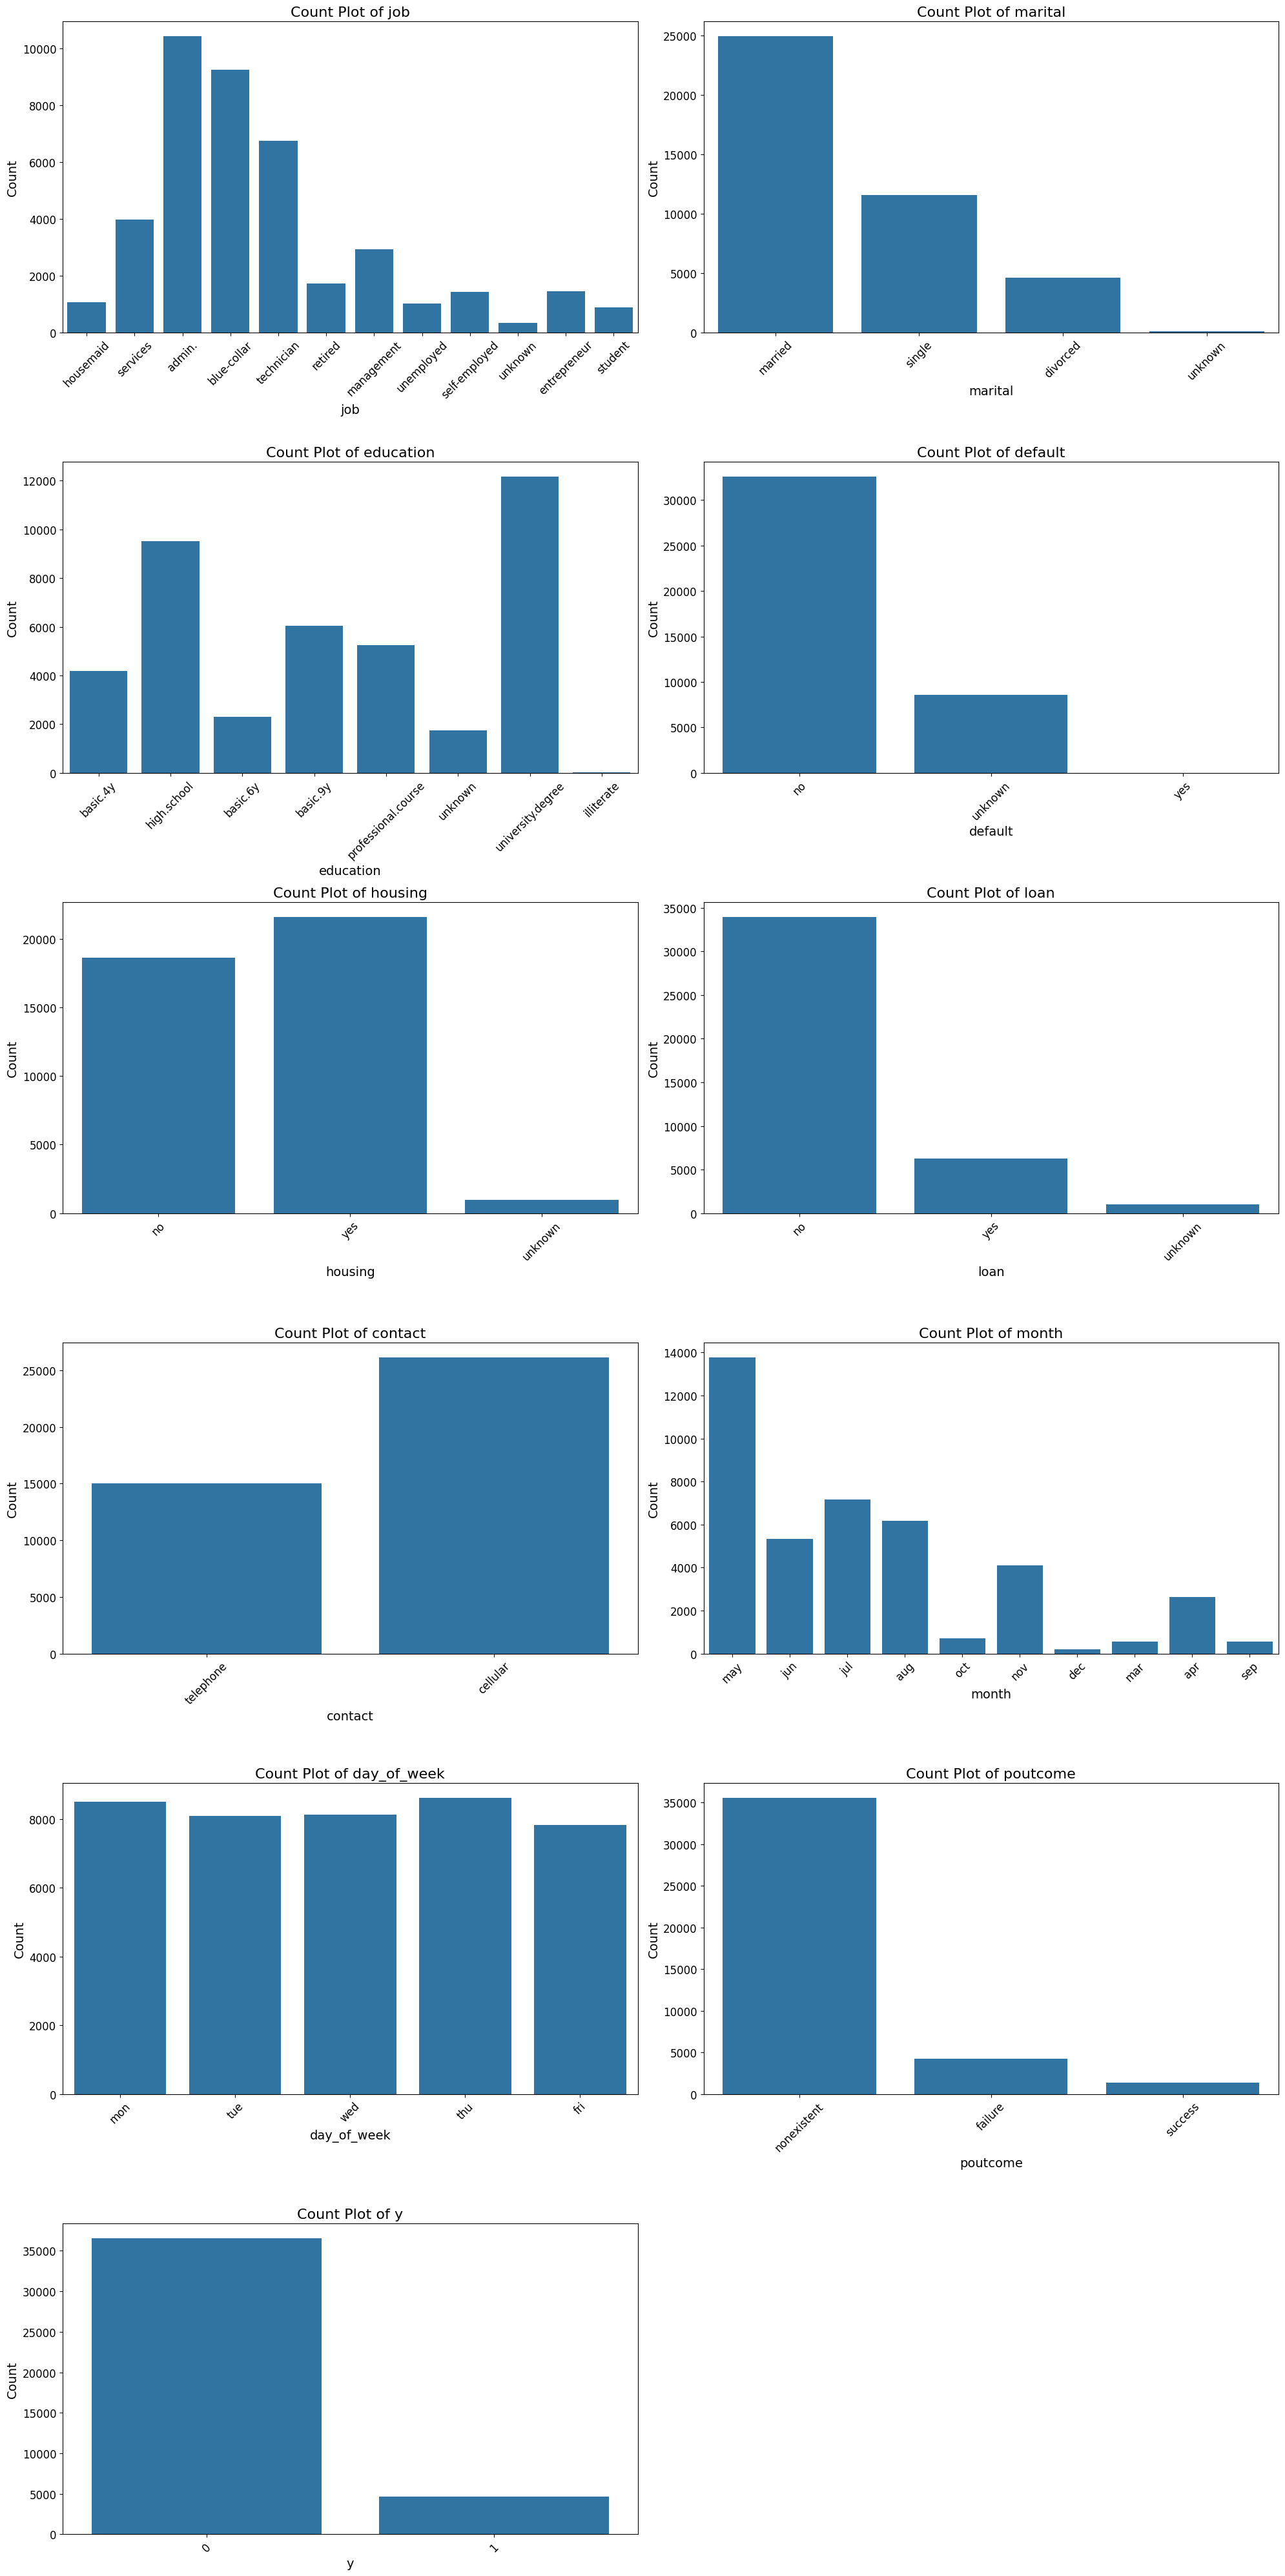

In [ ]:
# List of categorical columns to visualize
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Number of rows and columns for subplots
num_rows = 6  # Total number of categorical columns divided by 2, rounded up
num_cols = 2

# Calculate total number of subplots needed
total_plots = len(categorical_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each categorical column and plot count plot
for i, col in enumerate(categorical_cols):
    # Plot count plot using seaborn countplot
    sns.countplot(data=df, x=col, ax=axes[i])

    # Set plot title
    axes[i].set_title(f'Count Plot of {col}', fontsize=16)

    # Set x-axis label
    axes[i].set_xlabel(col, fontsize=14)

    # Set y-axis label
    axes[i].set_ylabel('Count', fontsize=14)

    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)

    # Set font size of tick labels
    axes[i].tick_params(axis='both', which='major', labelsize=12)

# Hide any unused subplots
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()


## plot the education and the count of the target

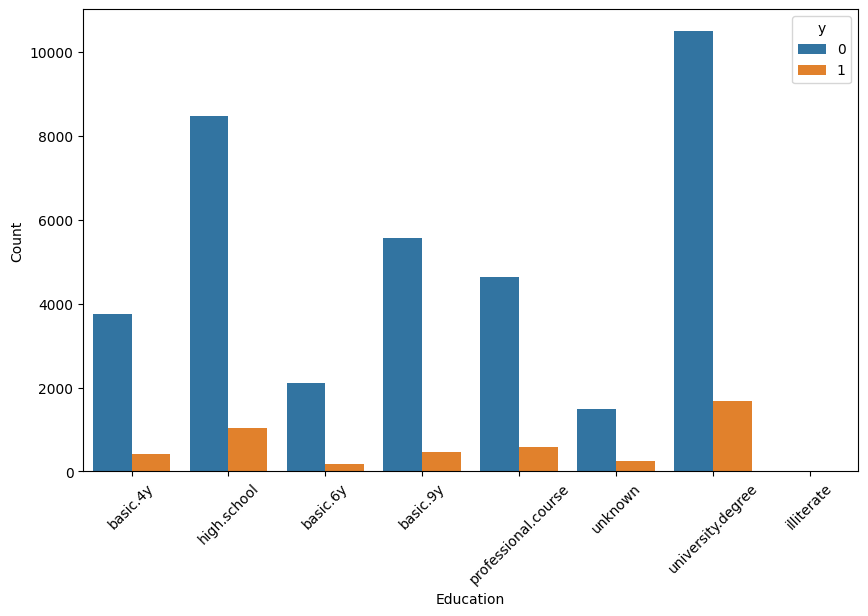

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot a count plot with hue
sns.countplot(data=df, x='education', hue='y')

# Set x-axis label
plt.xlabel('Education')

# Set y-axis label
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with title and specify its location
plt.legend(title='y', loc='upper right')

# Display the plot
plt.show()

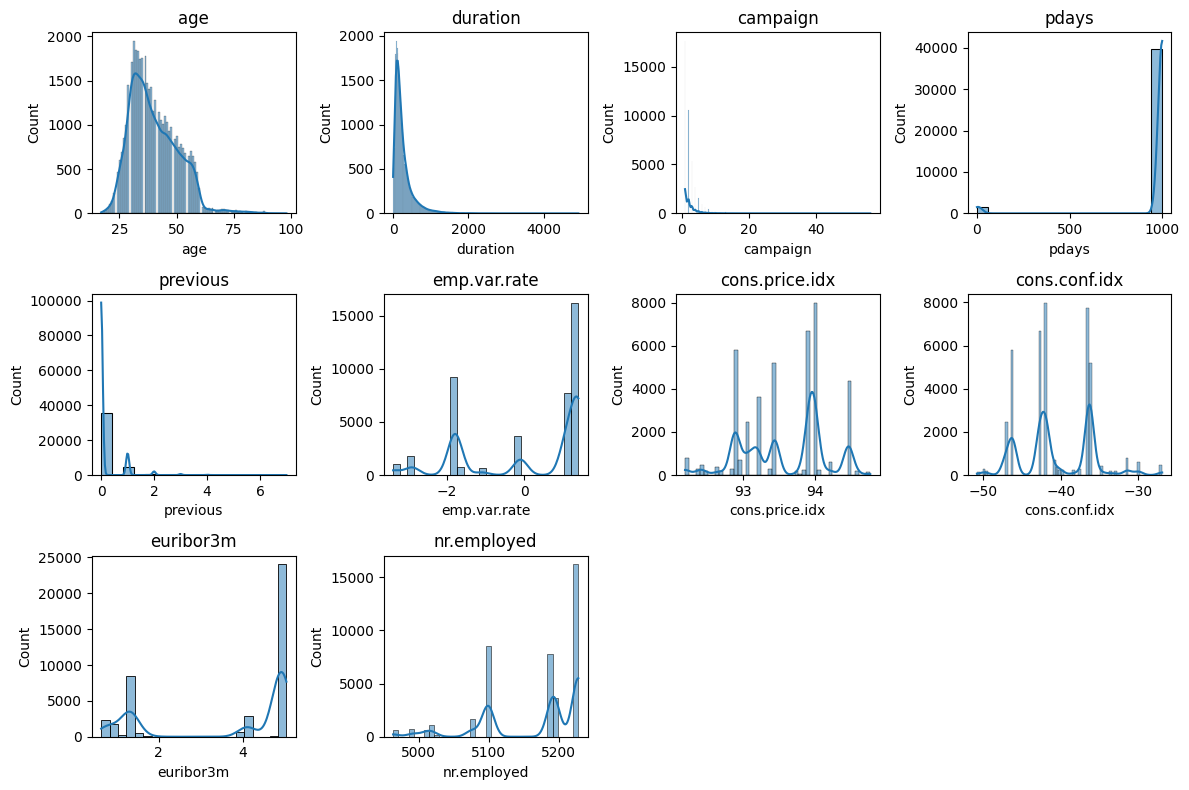

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Iterate over each numerical column and plot histogram
for i, col in enumerate(numerical_cols):
    # Create subplots with 3 rows and 4 columns
    plt.subplot(3, 4, i+1)

    # Plot histogram using seaborn histplot
    sns.histplot(df[col], kde=True)

    # Set title for the subplot
    plt.title(col)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## make a correlation matrix to the numerical columns
###### displays the correlation coefficients for different variables

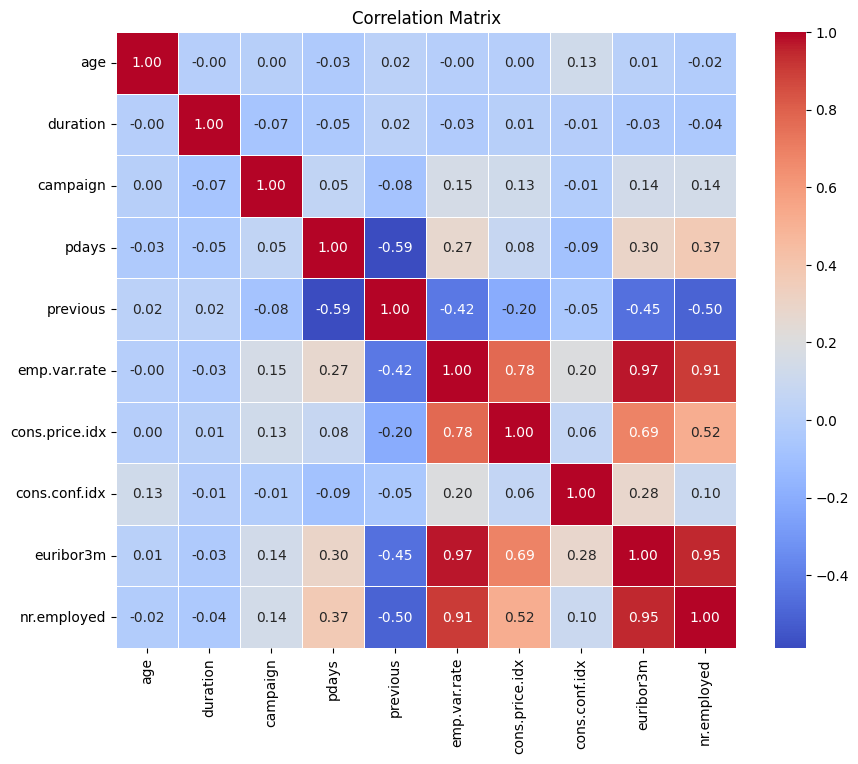

In [ ]:
# Correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Plot the categorical columns and the count of the target

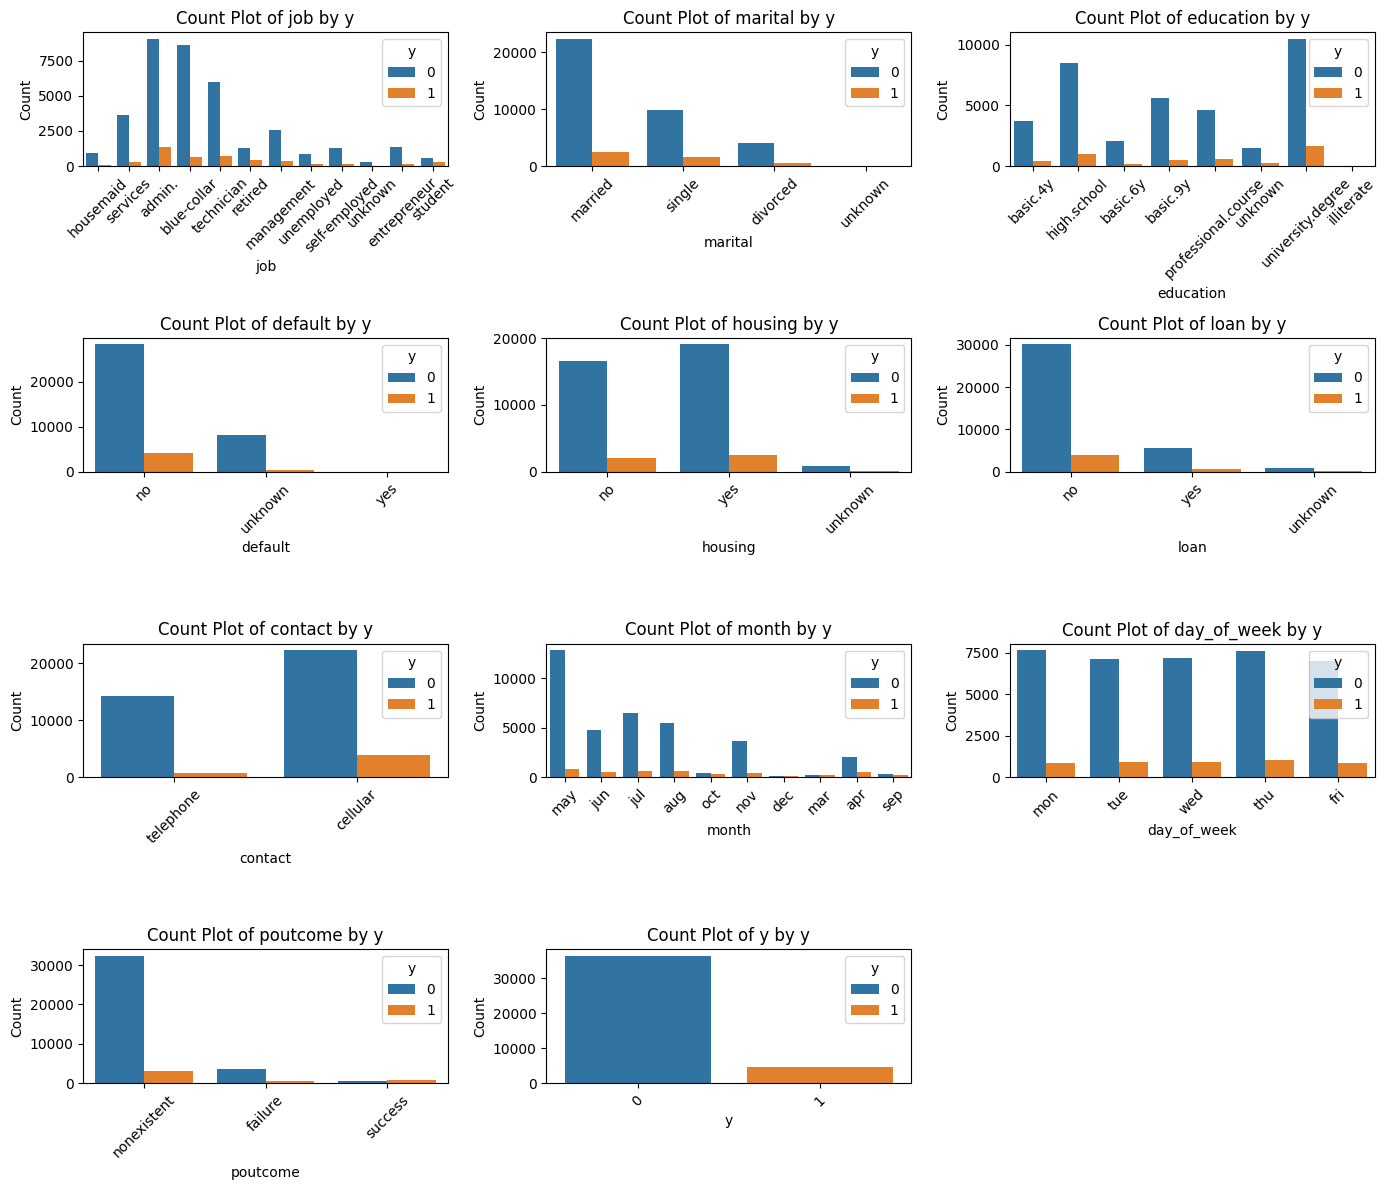

In [ ]:
# Create a figure with a specified size
plt.figure(figsize=(14, 12))

# Iterate over each categorical column and plot count plot with hue
for i, col in enumerate(categorical_cols):
    # Create subplots with 4 rows and 3 columns
    plt.subplot(4, 3, i+1)

    # Plot count plot using seaborn countplot with hue
    sns.countplot(data=df, x=col, hue='y')

    # Set title for the subplot
    plt.title(f'Count Plot of {col} by y')

    # Set x-axis label
    plt.xlabel(col)

    # Set y-axis label
    plt.ylabel('Count')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# split the data

## make the x : data and y : target
### split the data to X_train, X_test, y_train, y_test
### and get the shape

In [ ]:
# Define the features (X) and target variable (y)
X = df.drop(columns = ['y'])  # Replace 'target_column_name' with the name of your target variable column
y = df['y']

# Optionally, you can also perform train-test split at this stage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32940, 20)
Shape of X_test: (8236, 20)
Shape of y_train: (32940,)
Shape of y_test: (8236,)


# Function to find optimal number of components for PCA

In [ ]:
# Function to find optimal number of components for PCA
def find_optimal_n_components(X_train, explained_variance_threshold = 0.95):
    # Define a range of components to try
        components_range = range(1, min(X_train.shape[0], X_train.shape[1]) + 1)

        cv_scores = []
        for n_components in components_range:
              pca = PCA(n_components=n_components)
              scores = cross_val_score(pca, X_train, cv=5)  # 5-fold cross-validation
              cv_scores.append(np.mean(scores))
        optimal_n_components = components_range[np.argmax(cv_scores)]

        print(f'Optimal number of components based on cross-validation: {optimal_n_components}')
        return optimal_n_components

### make a normalization to the numerical columns and make encoder to the categorical columns

#### plot the optimal number components

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_base.py:76: RuntimeWarning: divide by zero encountered in divide
  precision.flat[:: len(precision) + 1] += 1.0 / exp_var_diff
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 700, in score
    return np.mean(self.score_samples(X))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 675, in score_samples
    precision = self.get

Optimal number of components based on cross-validation: 54
Optimal number of components for PCA: 54


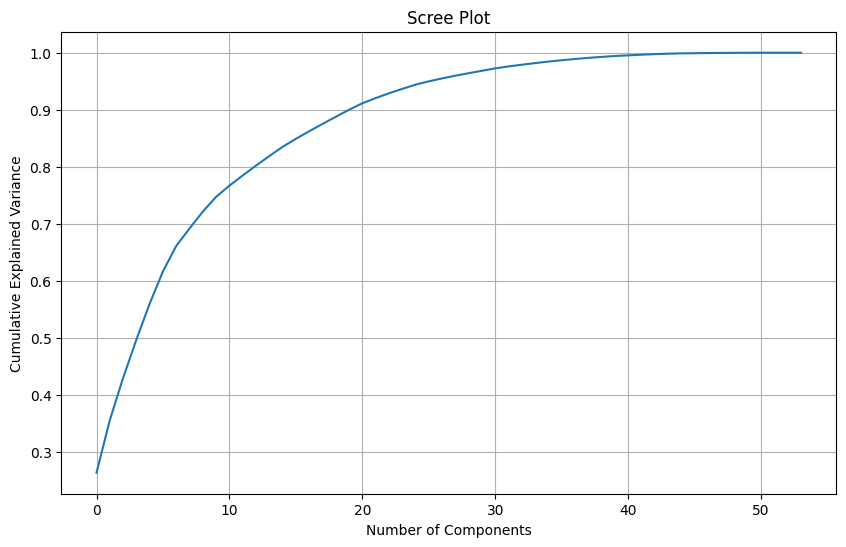

In [ ]:
# Preprocessing steps for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int', 'float']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Find optimal number of components for PCA
optimal_n_components = find_optimal_n_components(X_train_preprocessed)

# Print the number of optimal components
print(f'Optimal number of components for PCA: {optimal_n_components}')

# Add PCA for dimensionality reduction
pca = PCA(n_components=optimal_n_components)

# Create a preprocessing pipeline with PCA
pipeline = Pipeline(steps=[('pca', pca)])

# Fit and transform the training data
X_train_preprocessed_pca = pipeline.fit_transform(X_train_preprocessed)

# Transform the testing data
X_test_preprocessed_pca = pipeline.transform(preprocessor.transform(X_test))

# Generate Scree Plot to check explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# SVC

## make the model to train and predict

In [ ]:
# Initialize SVC
svc = SVC()

# Train SVC on the reduced-dimensional training data
svc.fit(X_train_preprocessed_pca, y_train)

# Predict the target variable for the test data
y_pred = svc.predict(X_test_preprocessed_pca)

## get the accuracy and the TP ,TN ,FN ,FP ,precision and recall
### make a confusion matrix

Accuracy of SVC: 0.9083292860611948
True Positive: 400
True Negative: 7081
False Positive: 184
False Negative: 571
precision_score: 0.684931506849315
recall: 0.411946446961895


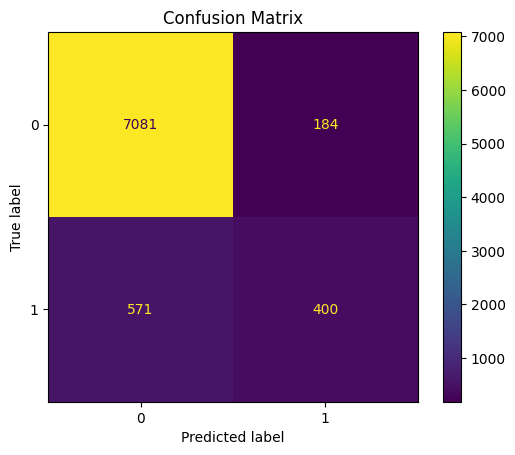

In [ ]:
bef_balancing=[]
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVC:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
bef_balancing.append(accuracy)
bef_balancing.append(tp)
bef_balancing.append(tn)
bef_balancing.append(fp)
bef_balancing.append(fn)
bef_balancing.append(precision)
bef_balancing.append(recall)
print(f'precision_score: {precision}')
print(f'recall: {recall}')

# Plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# FROM HERE Make THE DATA BALANCED

## we make a random over sampler
### Object to over-sample the minority class(es) by picking samples at random with replacement. The bootstrap can be generated in a smoothed manner.

In [ ]:
X = df.drop(columns = ['y'])  # Replace 'target_column_name' with the name of your target variable column
y = df['y']

ros = RandomOverSampler(random_state=42)
bal_x, bal_y = ros.fit_resample(X , y)
print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(bal_y))

Original dataset shape Counter({0: 36537, 1: 4639})
Resample dataset shape Counter({0: 36537, 1: 36537})


### plot the numerical columns after the balancing

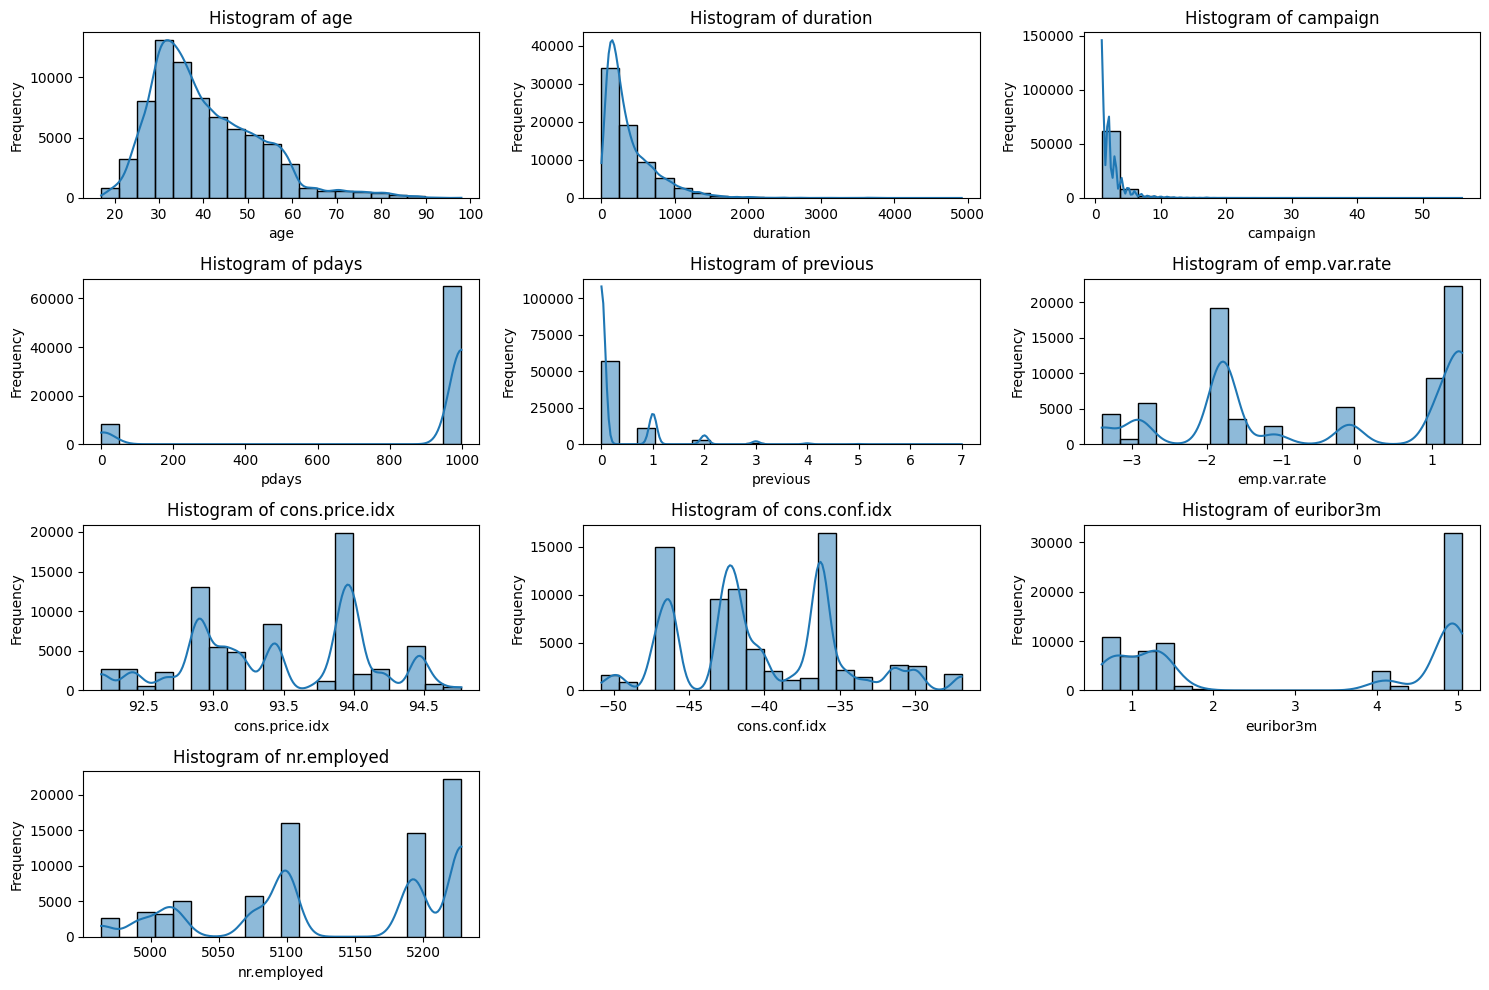

In [ ]:
# Number of rows and columns for subplots
num_rows = 4  # Total number of numerical columns divided by 3, rounded up
num_cols = 3

# List of numerical columns to visualize
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


# Calculate total number of subplots needed
total_plots = len(numerical_cols)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Iterate over each numerical column and plot histogram
for i, col in enumerate(numerical_cols):
    # Plot histogram using seaborn histplot
    sns.histplot(bal_x[col], bins=20, kde=True, ax=axes[i])

    # Set plot title
    axes[i].set_title(f'Histogram of {col}')

    # Set x-axis label
    axes[i].set_xlabel(col)

    # Set y-axis label
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for i in range(total_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

### marital

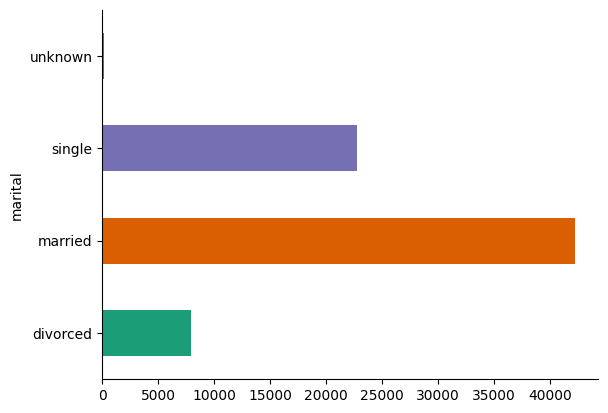

In [ ]:
bal_x.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

 ### education

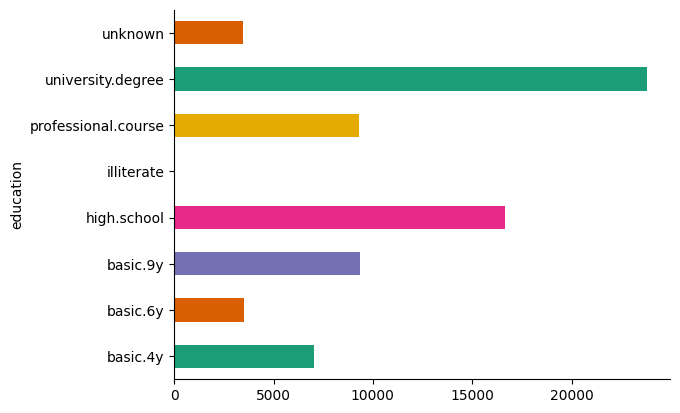

In [ ]:
bal_x.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### marital VS Age

<ipython-input-61-6f84863d6239>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(bal_x, x='age', y='marital', inner='box', palette='Dark2')


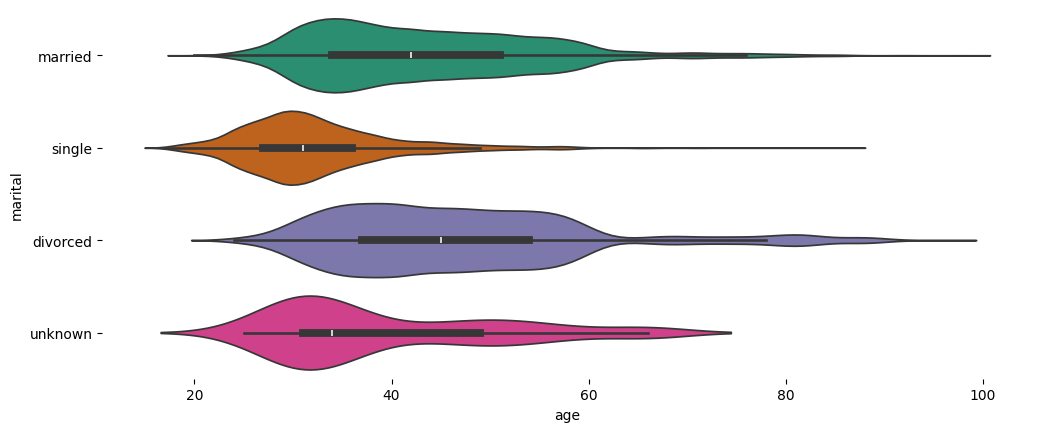

In [ ]:
figsize = (12, 1.2 * len(bal_x['marital'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(bal_x, x='age', y='marital', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### education Vs Age

<ipython-input-62-476e393df0cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(bal_x, x='age', y='education', inner='box', palette='Dark2')


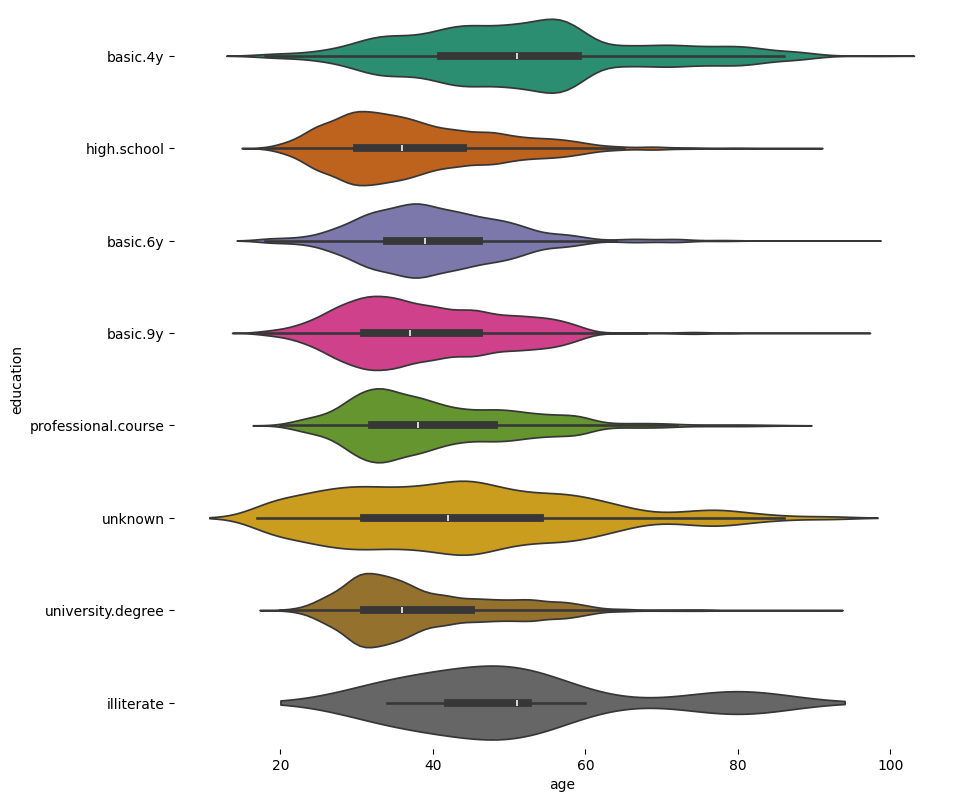

In [ ]:
figsize = (10, 1.2 * len(bal_x['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(bal_x, x='age', y='education', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Split the data after balancing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bal_x, bal_y, test_size = 0.2, random_state = 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (58459, 20)
Shape of X_test: (14615, 20)
Shape of y_train: (58459,)
Shape of y_test: (14615,)


### make a normalization to the numerical columns and make encoder to the categorical columns

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_base.py:76: RuntimeWarning: divide by zero encountered in divide
  precision.flat[:: len(precision) + 1] += 1.0 / exp_var_diff
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 117, in __call__
    score = scorer(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 700, in score
    return np.mean(self.score_samples(X))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_pca.py", line 675, in score_samples
    precision = self.get

Optimal number of components based on cross-validation: 54
Optimal number of components for PCA: 54


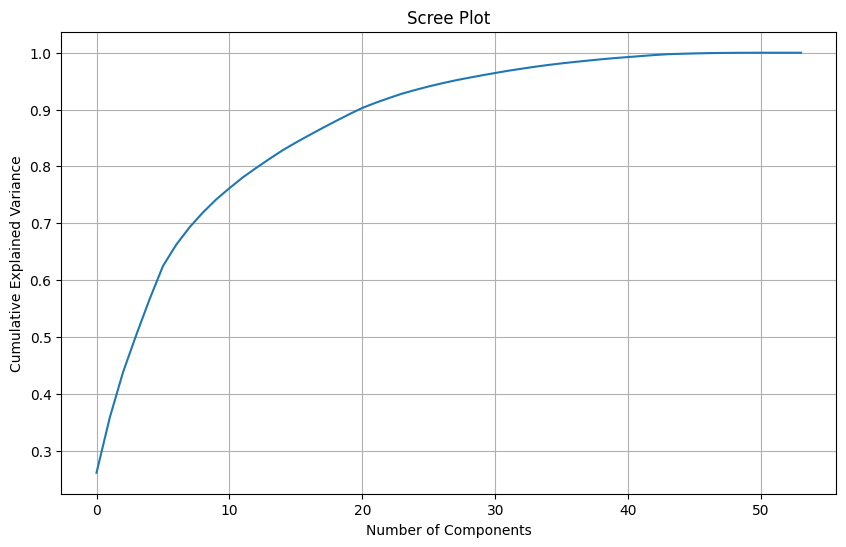

In [ ]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Identify numerical and categorical features
numerical_features = bal_x.select_dtypes(include=['int', 'float']).columns
categorical_features = bal_x.select_dtypes(include=['object']).columns

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Find optimal number of components for PCA
optimal_n_components = find_optimal_n_components(X_train_preprocessed)

# Print the number of optimal components
print(f'Optimal number of components for PCA: {optimal_n_components}')

# Add PCA for dimensionality reduction
pca = PCA(n_components=optimal_n_components)

# Create a preprocessing pipeline with PCA
pipeline = Pipeline(steps=[('pca', pca)])

# Fit and transform the training data
X_train_preprocessed_pca = pipeline.fit_transform(X_train_preprocessed)

# Transform the testing data
X_test_preprocessed_pca = pipeline.transform(preprocessor.transform(X_test))

# Generate Scree Plot to check explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## SVM after balancing

### train and predict the data

In [ ]:
# Initialize SVC
svc = SVC()

# Train SVC on the reduced-dimensional training data
svc.fit(X_train_preprocessed_pca, y_train)

# Predict the target variable for the test data
y_pred = svc.predict(X_test_preprocessed_pca)

### get the accuracy and the TP,TN,FP,FN ,Precision and recall
#### make the confusion matric

Accuracy of SVC: 0.904755388299692
True Positive: 6961
True Negative: 6262
False Positive: 1086
False Negative: 306
precision_score: 0.8650428731204175
recall: 0.9578918398238613


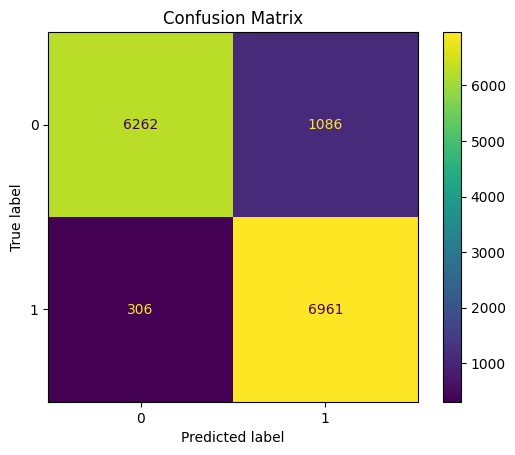

In [ ]:
aft_balancing=[]
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of SVC:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tp, tn, fp, fn = cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]
print(f'True Positive: {tp}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')

# Calculate precision and recall scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'precision_score: {precision}')
print(f'recall: {recall}')

aft_balancing.append(accuracy)
aft_balancing.append(tp)
aft_balancing.append(tn)
aft_balancing.append(fp)
aft_balancing.append(fn)
aft_balancing.append(precision)
aft_balancing.append(recall)
# Plot the confusion matrix
disp.plot()
plt.title('Confusion Matrix')
plt.show()

## Make a data frame to get the accuray between the balanced and the imbalanced data
#### we see that there is a diffrence between the balanced and the imbalanced data


In [ ]:
df1=pd.DataFrame({ "Befor_balancing":bef_balancing , "After_balancing":aft_balancing},index=["Accuracy","TP","TN","Fn","FP","Precision","Recall"])
df1

,Befor_balancing,After_balancing
Accuracy,0.908329,0.904755
TP,400.000000,6961.000000
TN,7081.000000,6262.000000
Fn,184.000000,1086.000000
FP,571.000000,306.000000
Precision,0.684932,0.865043
Recall,0.411946,0.957892


# .............. end ..............

# SVR_NEW

## befor the balancing

In [ ]:
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train_preprocessed_pca, y_train)
y_pred = svm_model.predict(X_test_preprocessed_pca)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
# Higher R-squared values suggest a better fit, but it doesn't necessarily mean the model is a good predictor in an absolute sense.

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred , residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [ ]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
y_pred_round = svm_model.predict(X_test_preprocessed_pca).round()

Accuracy of SVR: 0.8937591063623118
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.66      0.21      0.31       971

    accuracy                           0.89      8236
   macro avg       0.78      0.60      0.63      8236
weighted avg       0.87      0.89      0.87      8236



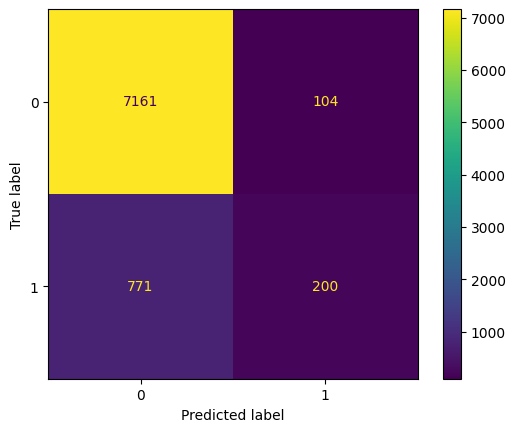

In [ ]:
accuracy = accuracy_score(y_test, y_pred_round)
print("Accuracy of SVR:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_round)

# Display the confusion matrix
print(classification_report(y_test,y_pred_round))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

## after balancing

In [ ]:
# Initialize SVC
svr = SVR()

# Train SVC on the reduced-dimensional training data
svr.fit(X_train_preprocessed_pca, y_train)

# Predict the target variable for the test data
y_pred = svr.predict(X_test_preprocessed_pca)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
# Higher R-squared values suggest a better fit, but it doesn't necessarily mean the model is a good predictor in an absolute sense.

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

In [ ]:
residuals = y_test - y_pred
plt.scatter(y_pred , residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

In [ ]:
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
y_pred_round = y_pred.round()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_round)
print("Accuracy of SVR:", accuracy)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_round)

# Display the confusion matrix
print(classification_report(y_test,y_pred_round))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()